<a href="https://colab.research.google.com/github/beilak/qdev/blob/main/first_step/Q_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit -q
!pip install qiskit_ibm_provider -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [3]:
import os
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer, transpile
import matplotlib.pyplot as plt
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider.ibm_backend import IBMBackend
from qiskit_aer.backends.qasm_simulator import QasmSimulator
from qiskit_aer.jobs.aerjob import AerJob



In [4]:
TOKEN: str = ""

In [5]:
# Circuit
qc: QuantumCircuit = QuantumCircuit(3)

# Gate's
qc.h(0)

qc.cx(0, 1)
qc.cx(0, 2)

qc.measure_all()

qc.draw()


┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

{'000': 537, '111': 487}


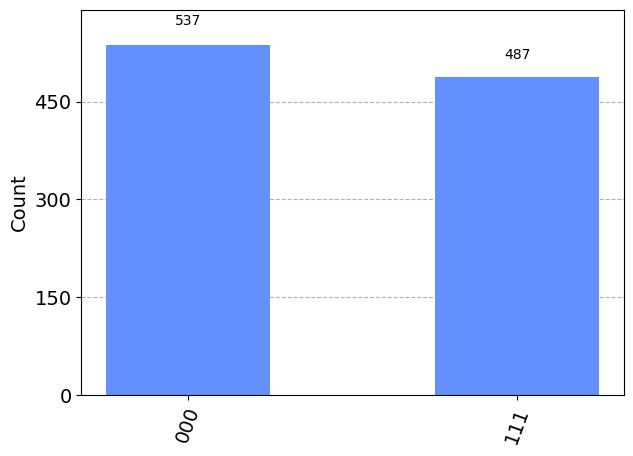

In [7]:
# SIMULATOR
backend_sim: QasmSimulator = Aer.get_backend('qasm_simulator')
job_sim: AerJob = backend_sim.run(
    transpile(qc, backend_sim),
    shots=1024,
)

result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

plot_histogram(counts)


In [ ]:
# # Connect to QUANTUM COMPUTER.
print(f"Looking for Backend")
provider: IBMProvider = IBMProvider(token=TOKEN)
backend: IBMBackend = provider.backends(
    filters=lambda x: not x.configuration().simulator
                      and x.status().operational == True,
    min_num_qubits=3,
)[0]
print(f"{ backend = }")

transpiled_qc: QuantumCircuit = transpile(qc, backend)
print(f"Running QC....")
job = backend.run(
    transpiled_qc,
    job_tags=["31", "CNOT"],
    shots=1024,
)
print(f"DONE")